In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


C:\Users\neela\AppData\Local\Temp\ipykernel_18416\1902694512.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


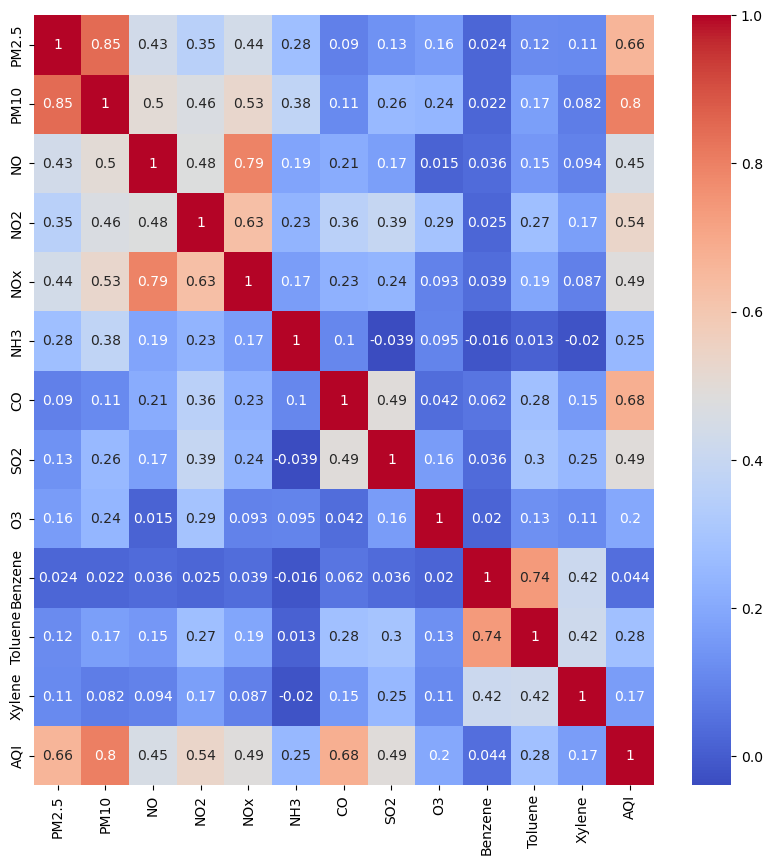

In [8]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.savefig("heatmap.png", dpi=300, bbox_inches="tight")  # Saves in PNG format
plt.savefig("heatmap.pdf", dpi=300, bbox_inches="tight")

In [6]:
df.drop(["City", "PM10", "Date","NO","NOx","NH3", "Benzene", "Toluene", "Xylene","AQI_Bucket"], axis=1, inplace=True)

In [7]:
#Calculating NaN Values
df.isna().sum()

PM2.5    4598
NO2      3585
CO       2059
SO2      3854
O3       4022
AQI      4681
dtype: int64

In [8]:
df = df.dropna().reset_index(drop=True)

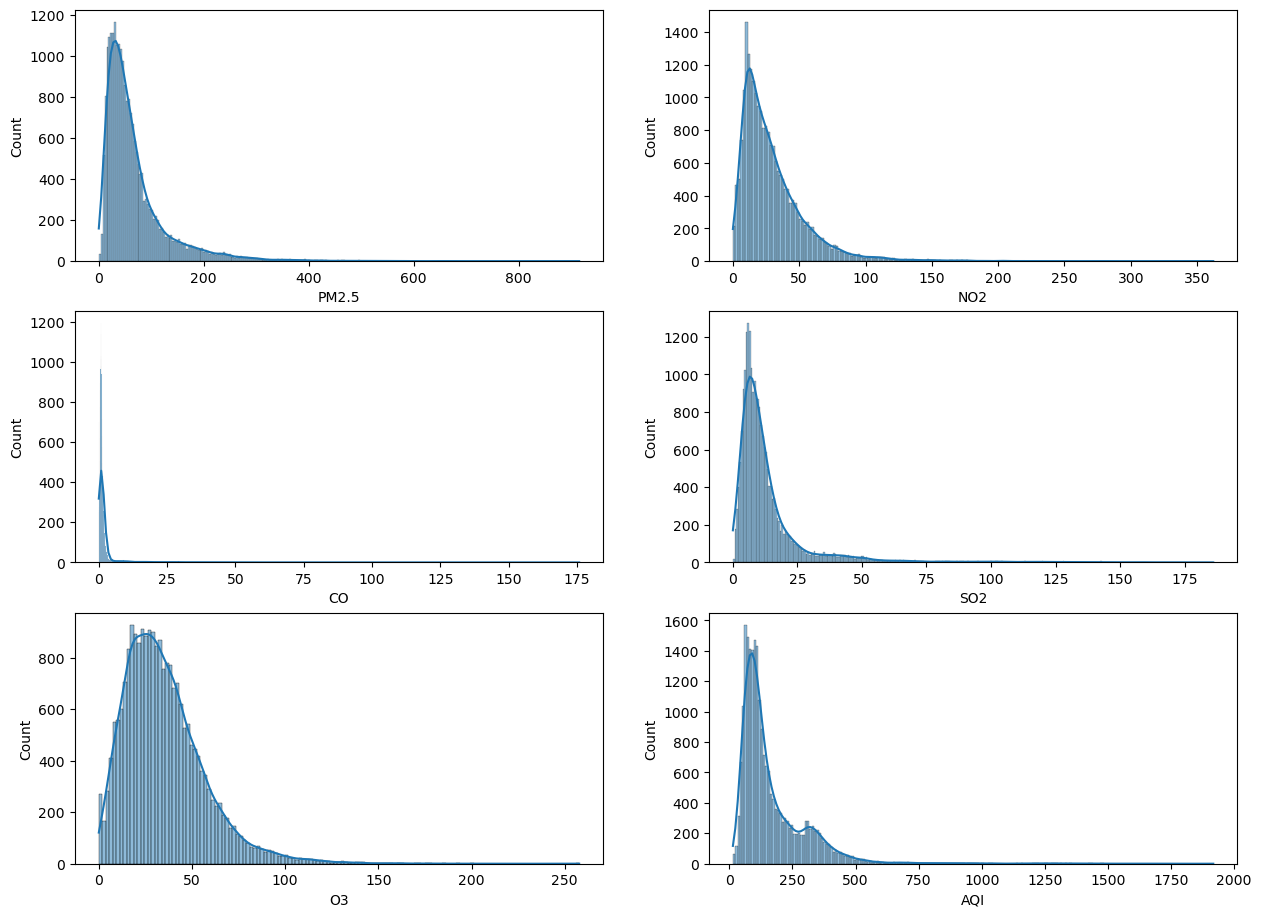

In [9]:
#Checking Data Distribution
plt.figure(figsize=(15,15))
for i in range(1,df.shape[1]+1):
    plt.subplot(4,2,i)
    sns.histplot(data=df[df.columns[i-1]],kde=True)

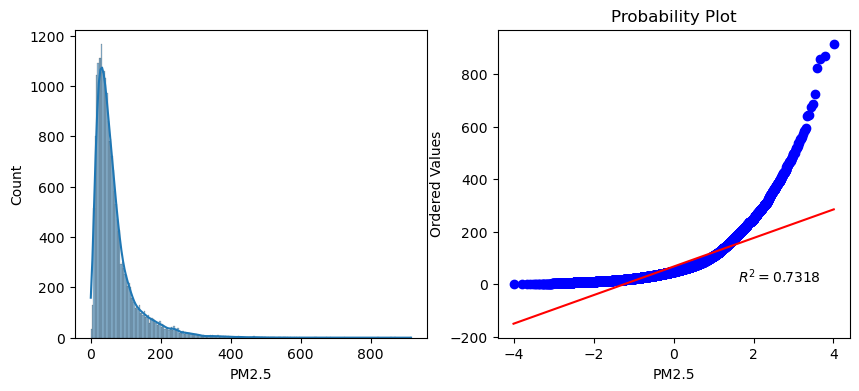

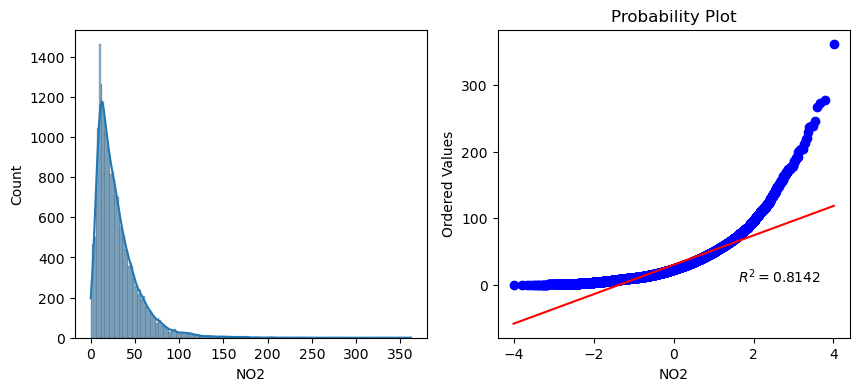

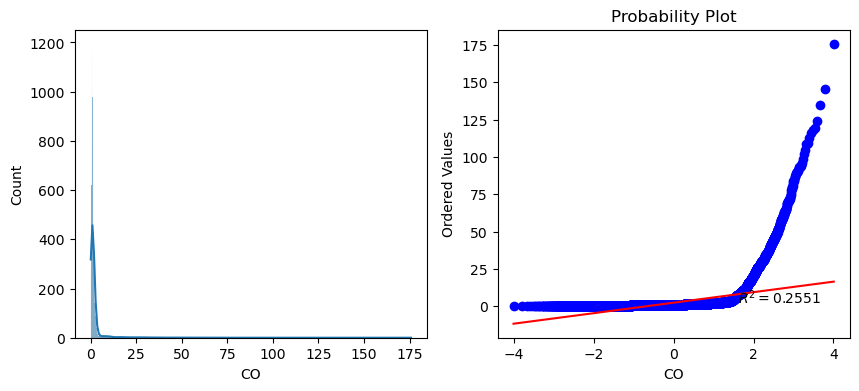

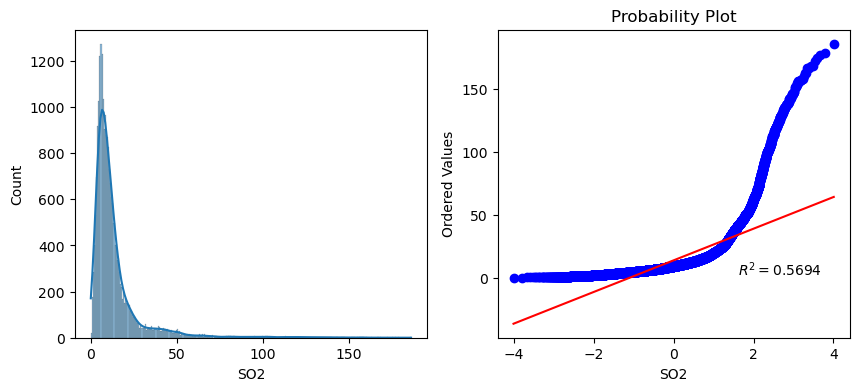

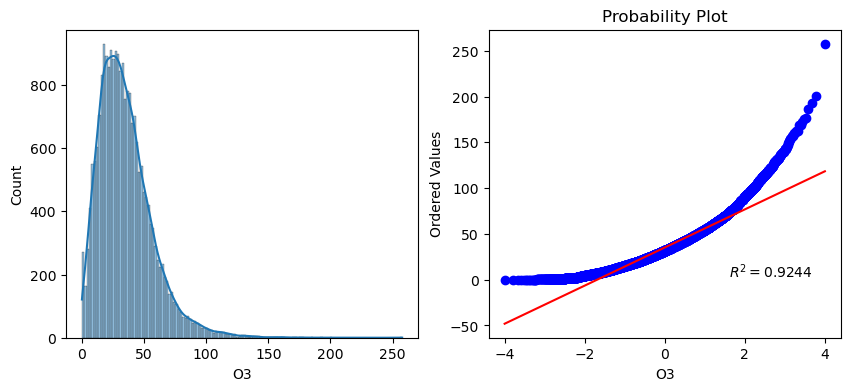

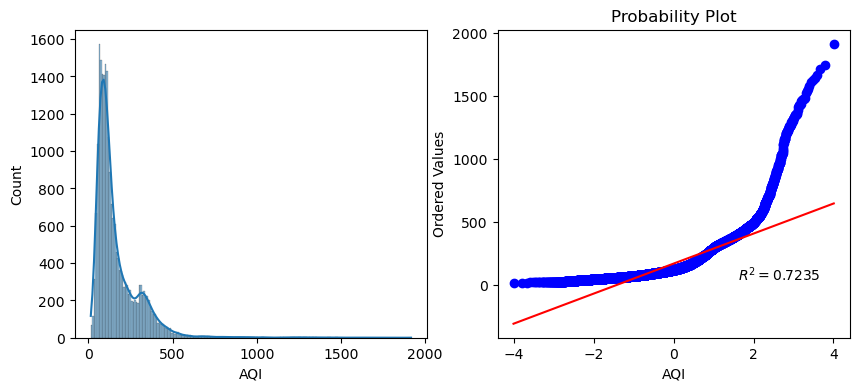

In [10]:
#Using QQ Plot
from scipy import stats
from scipy.stats import norm

columns=df.columns.to_list()

def QQplot(df,variable):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[variable],kde=True)
    plt.xlabel(variable)
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist="norm",plot=plt,rvalue=True)
    plt.xlabel(variable)
for i in columns:
    QQplot(df,i)

In [11]:
#Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=df
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

vif

,VIF,Features
0,6.943637,PM2.5
1,4.012763,NO2
2,3.585175,CO
3,2.853926,SO2
4,2.908019,O3
5,15.051693,AQI


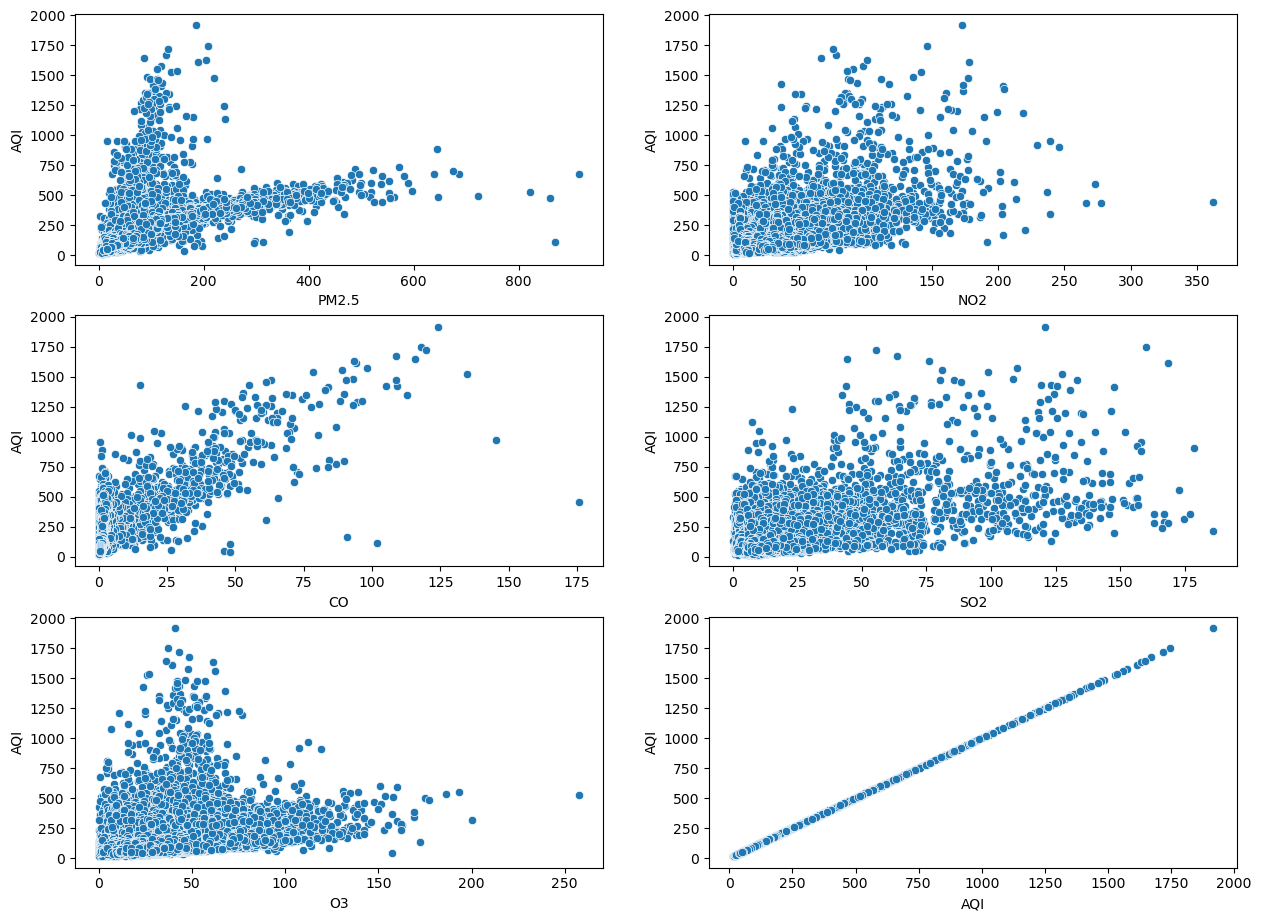

In [12]:
#Plotting Scatter Plot
plt.figure(figsize=(15,15))
for i in range(1,df.shape[1]+1):
    plt.subplot(4,2,i)
    sns.scatterplot(x=df[df.columns[i-1]],y=df.AQI)

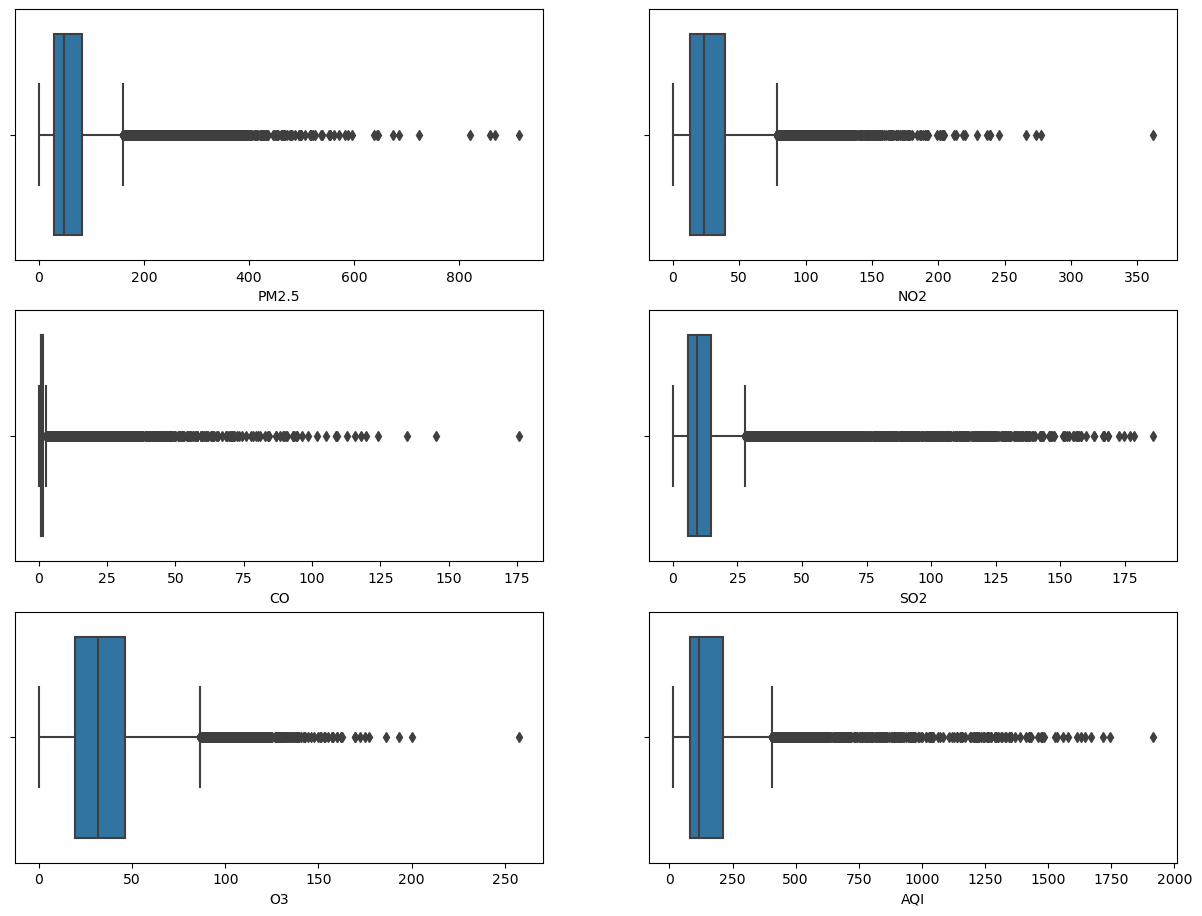

In [13]:
#Checking for Outliers
plt.figure(figsize=(15,15))
for i in range(1,df.shape[1]+1):
    plt.subplot(4,2,i)
    sns.boxplot(x=df[df.columns[i-1]])

In [14]:
df.describe()

,PM2.5,NO2,CO,SO2,O3,AQI
count,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000
mean,67.756028,29.718371,2.341847,13.891994,35.123085,167.385047
std,63.404533,24.503292,6.965907,16.661959,21.604953,140.384503
min,0.160000,0.010000,0.000000,0.010000,0.010000,14.000000
25%,29.032500,12.880000,0.610000,5.830000,19.560000,81.000000
50%,48.855000,23.220000,0.940000,9.220000,31.625000,118.000000
75%,81.340000,39.030000,1.470000,14.707500,46.250000,211.000000
max,914.940000,362.210000,175.810000,186.080000,257.730000,1917.000000


In [15]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [16]:
print(model.feature_importances_)

[0.43156076 0.07969755 0.36099666 0.10031001 0.02743503]


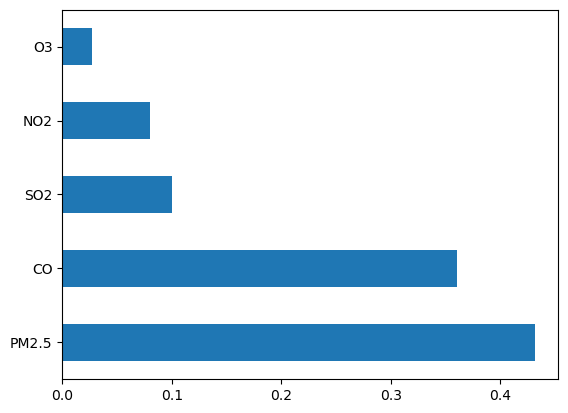

In [17]:
#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [18]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pickle
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [19]:
df.head()

,PM2.5,NO2,CO,SO2,O3,AQI
0,83.13,28.71,6.93,49.52,59.76,209.0
1,79.84,28.68,13.85,48.49,97.07,328.0
2,94.52,32.66,24.39,67.39,111.33,514.0
3,135.99,42.08,43.48,75.23,102.70,782.0
4,178.33,35.31,54.56,55.04,107.38,914.0


In [20]:
'''
In our dataset, the target label (the variable that we need to predict) is AQI column.
Rest other columns are feature variable (Independent features).
So our "X" will be all the columns except AQI and "y" will be AQI column
'''

#Splitting Data
X = df.iloc[:, :-1] #Independent features
y = df.iloc[:, -1] #Dependent feature

In [22]:
#Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
#Implementing Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
predict=model.predict(X_test)

In [27]:
from sklearn.metrics import *
r2_score(y_test,predict)


0.8607883927567761

In [28]:
print("Coefficient of Determination (R^2) for train dataset: ", model.score(X_train, y_train))
print("Coefficient of Determination (R^2) for test dataset: ", model.score(X_test, y_test))
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Coefficient of Determination (R^2) for train dataset:  0.8362423193454258
Coefficient of Determination (R^2) for test dataset:  0.8607883927567761
Intercept: 21.891961508642737
Slope: [ 1.26943789  0.46593048 10.45385616  0.91129305  0.24378119]


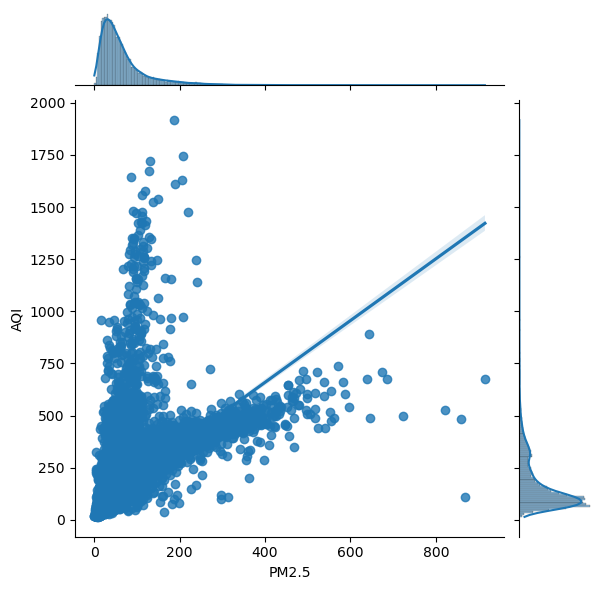

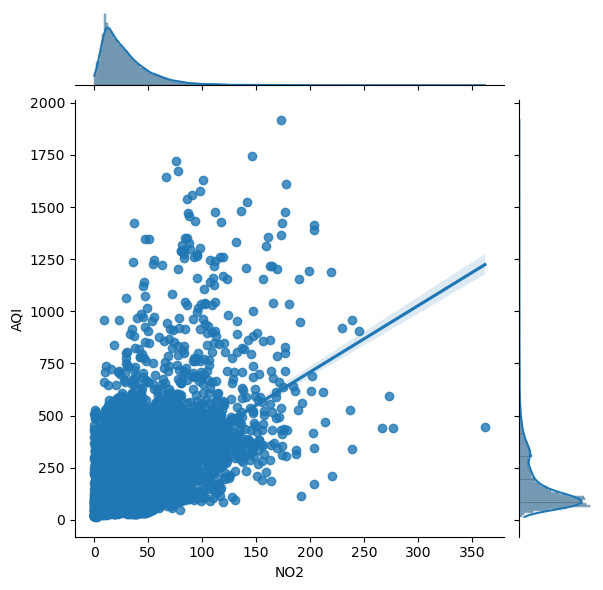

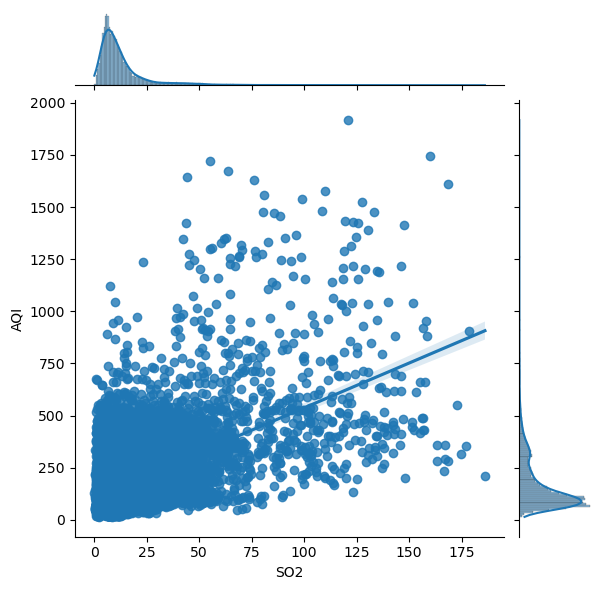

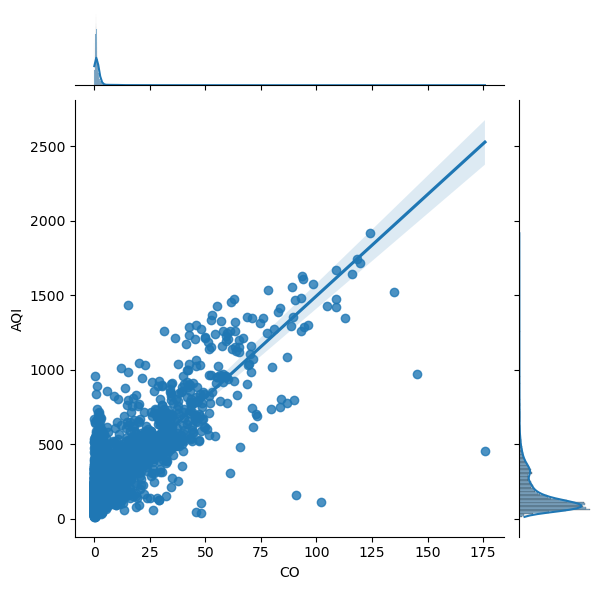

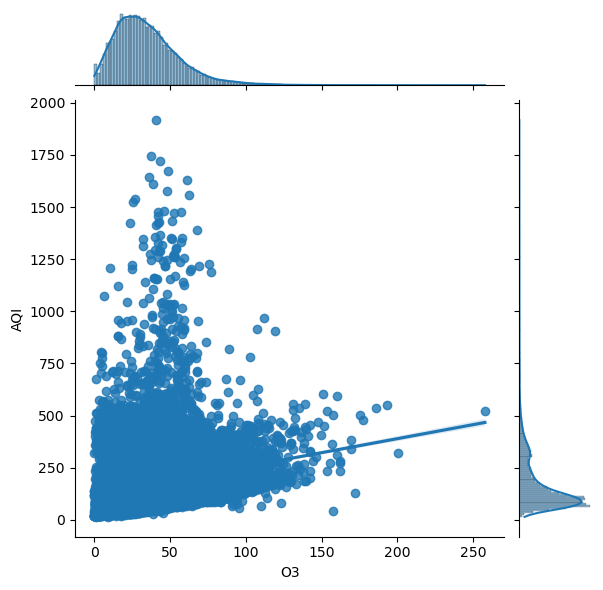

In [29]:
sns.jointplot(x="PM2.5", y="AQI", data=df, kind="reg")
sns.jointplot(x="NO2", y="AQI", data=df, kind="reg")
sns.jointplot(x="SO2", y="AQI", data=df, kind="reg")
sns.jointplot(x="CO", y="AQI", data=df, kind="reg")
sns.jointplot(x="O3", y="AQI", data=df, kind="reg")

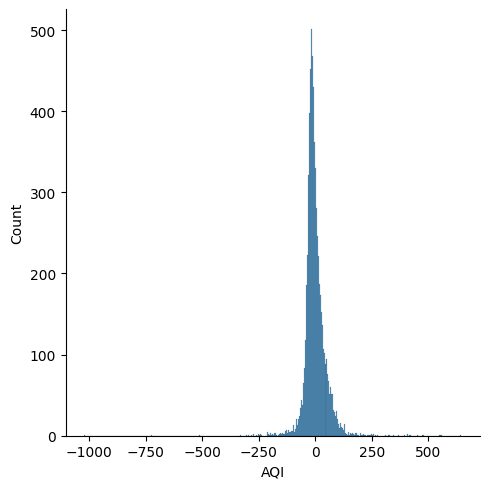

In [38]:
score = cross_val_score(model, X, y, cv=5)
score.mean()
prediction = model.predict(X_test)
sns.displot(y_test-prediction)

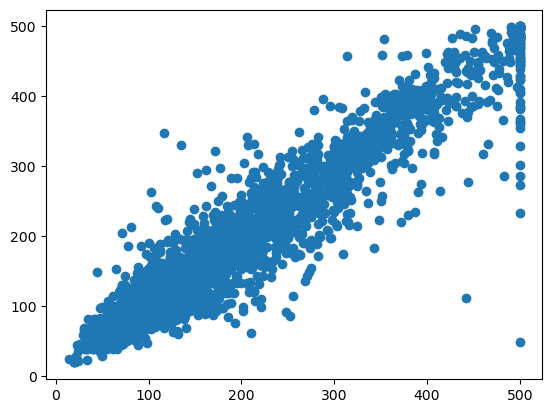

In [62]:
plt.scatter(y_test,prediction)

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 31.514492383621786
MSE: 2683.3309661408252
RMSE: 51.800878044110654


In [30]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [31]:
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


{'alpha': 1e-15}
-3778.5339883643974


<Axes: xlabel='AQI', ylabel='Density'>

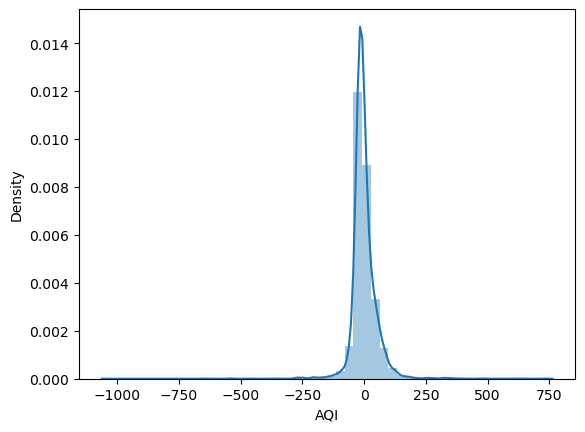

In [32]:
prediction=lasso_regressor.predict(X_test)
sns.distplot(y_test-prediction)

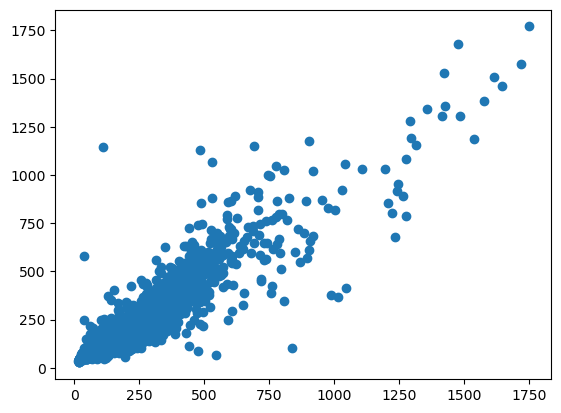

In [33]:
plt.scatter(y_test,prediction)

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 31.7196331690518
MSE: 2969.592810298567
RMSE: 54.49397040314247


In [35]:
r2_score(y_test,prediction)

0.8623623475459974

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [39]:
#Splitting Data
X = df.iloc[:, :-1] #Independent features
y = df.iloc[:, -1] #Dependent feature

#Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [40]:
#Calling and Fitting model
model = DecisionTreeRegressor(criterion="squared_error")
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [41]:
print("Coefficient of determination R^2 <-- on train set: {}".format(model.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(model.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on test set: 0.7834668608033872


In [42]:
score=cross_val_score(model,X,y,cv=5)
score.mean()


0.6718514819863892

<Axes: xlabel='AQI', ylabel='Density'>

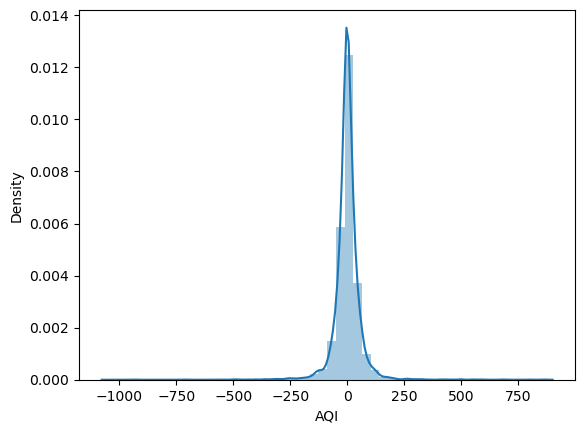

In [43]:
prediction=model.predict(X_test)
sns.distplot(y_test-prediction)

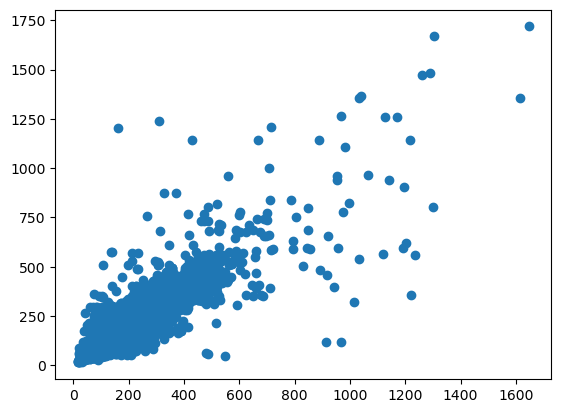

In [44]:
plt.scatter(y_test,prediction)

In [45]:
params={
"splitter" : ["best", "random"] ,
"max_depth" : [1, 3, 5, 7, 9, 11, 12, 15],
"min_samples_leaf" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
"min_weight_fraction_leaf":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
"max_features" : ["auto", "log2", "sqrt", None],
"max_leaf_nodes" : [None, 10, 20, 30, 40, 50, 60, 70, 80, 90] 
}

In [46]:
# Fitting GridSearchCV
random_search=GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1,cv=10, verbose=3)

In [47]:
#Using time function to calculate total time taken for tunning
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [48]:
start_time = timer(None)
random_search.fit(X,y)
timer(start_time)

Fitting 10 folds for each of 57600 candidates, totalling 576000 fits

 Time taken: 0 hours 34 minutes and 18.12 seconds.


In [49]:
#Printing Best Parameters and Score
print(random_search.best_params_)
print(random_search.best_score_)

{'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': 90, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
-10247.622973730126


<Axes: xlabel='AQI', ylabel='Density'>

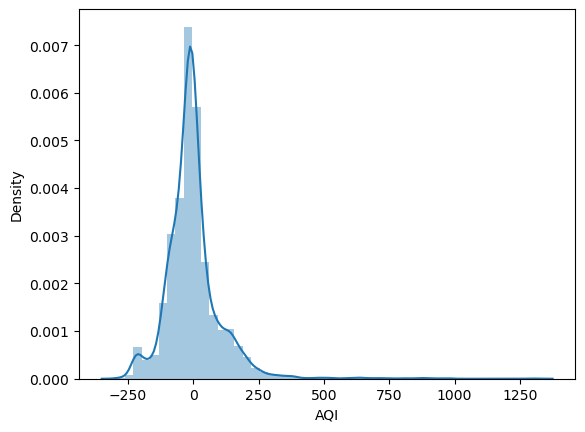

In [50]:
tuned_pred=random_search.predict(X_test)
sns.distplot(y_test-tuned_pred)

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 68.75039194542217
MSE: 11927.812562571537
RMSE: 109.21452541933942


In [52]:
r2_score(y_test, prediction)

0.7834668608033872

In [53]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from  sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from datetime import datetime
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [54]:
df["AQI"].values[df["AQI"] > 499] = 500

In [55]:
df

,PM2.5,NO2,CO,SO2,O3,AQI
0,83.13,28.71,6.93,49.52,59.76,209.0
1,79.84,28.68,13.85,48.49,97.07,328.0
2,94.52,32.66,24.39,67.39,111.33,500.0
3,135.99,42.08,43.48,75.23,102.70,500.0
4,178.33,35.31,54.56,55.04,107.38,500.0
...,...,...,...,...,...,...
22613,15.02,25.06,0.47,8.55,23.30,41.0
22614,24.38,26.06,0.52,12.72,30.14,70.0
22615,22.91,29.53,0.48,8.42,30.96,68.0
22616,16.64,29.26,0.52,9.84,28.30,54.0


In [56]:
#Splitting data as X and y
X = df.iloc[:, :-1] #Independent features
y = df.iloc[:, -1] #Dependent feature

In [57]:
X_train_unseen, X_test_unseen, y_train_unseen, y_test_unseen = train_test_split(X, y, test_size=0.05,random_state=1)
len(X_train_unseen),len(X_test_unseen)

(21487, 1131)

In [58]:
# Splitting that 95% data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_train_unseen, y_train_unseen, test_size=0.20,random_state=1)

In [59]:
# Fitting Model without any tunning
model = RandomForestRegressor(n_estimators = 200, random_state = 0)
model = model.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Coefficient of Determination (R^2) for train dataset: ", model.score(X_train, y_train))
print("Coefficient of Determination (R^2) for test dataset: ", model.score(X_test, y_test))

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Coefficient of Determination (R^2) for train dataset:  0.9878910757554696
Coefficient of Determination (R^2) for test dataset:  0.9165444529936397
MAE: 20.956891577477897
MSE: 1067.226112075384
RMSE: 32.6684268380861


In [60]:
r2_score(y_test,prediction)

0.9165444529936397

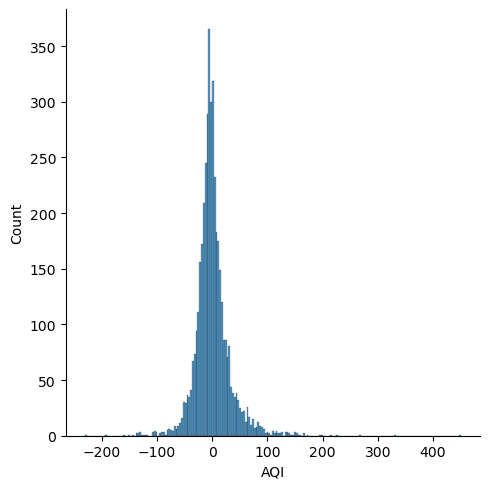

In [63]:
sns.displot(y_test - prediction)

In [64]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=18)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 10,12]
params = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [65]:
rf = RandomForestRegressor()
tuned_model = RandomizedSearchCV(rf, params, scoring='neg_mean_squared_error', 
                            cv=5, n_iter=20, random_state=43, n_jobs=-1)

In [66]:
tuned_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 12],
                                        'n_estimators': [100, 164, 229, 294,
                                                         358, 423, 488, 552,
                                                         617, 682, 747, 811,
                                                         876, 941, 1005, 1070,
                                                         1135, 1200]},
                   random_state=43, scoring='neg_mean_squared_error')

In [67]:
#Printing Best Parameter during tunning
print(tuned_model.best_estimator_)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=552)


In [68]:
# Now using the best parameter and predicting
best_rf = RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=552)

In [69]:
best_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=552)

In [70]:
prediction=best_rf.predict(X_test)

In [71]:
r2_score(y_test,prediction)

0.9102852733420814

In [72]:
print("Coefficient of Determination (R^2) for train dataset: ", best_rf.score(X_train, y_train))
print("Coefficient of Determination (R^2) for test dataset: ", best_rf.score(X_test, y_test))

Coefficient of Determination (R^2) for train dataset:  0.9181459199565225
Coefficient of Determination (R^2) for test dataset:  0.9102852733420814


In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 22.902369618390132
MSE: 1147.268244730807
RMSE: 33.87134843390217


In [84]:
X_test_unseen.head()

,PM2.5,NO2,CO,SO2,O3
14349,38.82,26.56,0.82,10.25,20.06
12364,63.58,40.25,0.23,27.84,50.72
19768,62.33,2.60,0.59,7.46,29.58
8955,118.43,84.21,0.89,37.55,39.59
4563,37.67,37.32,1.06,7.06,34.92


In [85]:
y_test_unseen.head()

14349     74.0
12364    141.0
19768    111.0
8955     421.0
4563      84.0
Name: AQI, dtype: float64

In [86]:
print(best_rf.predict([[38.82,26.56,0.82,10.25,20.06]]))
print(best_rf.predict([[63.58,40.25,0.23,27.84,50.72]]))
print(best_rf.predict([[62.33,2.60,0.59,7.46,29.58]]))
print(best_rf.predict([[118.43,84.21,0.89,37.55,39.59]]))
print(best_rf.predict([[37.67,37.32,1.06,7.06,34.92]]))

[91.17971969]
[135.76571056]
[115.50204929]
[302.52868925]
[100.05493608]


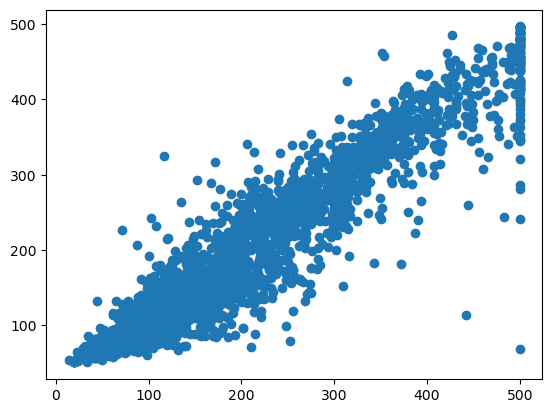

In [83]:
plt.scatter(y_test,prediction)

In [87]:
import pickle
with open("airquality.pkl","wb") as file:
    pickle.dump(best_rf,file)

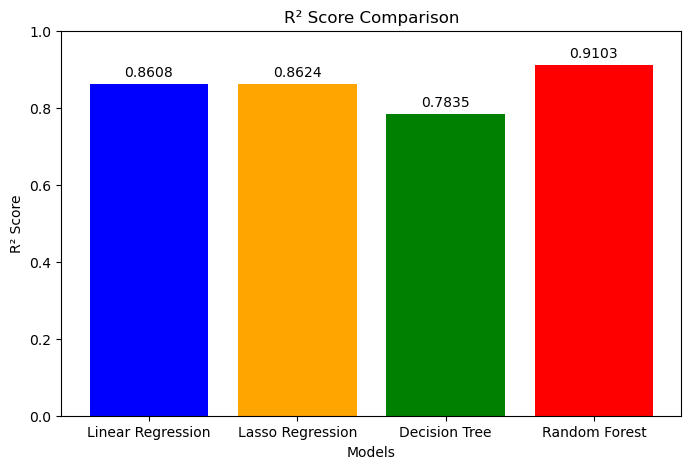

<Figure size 640x480 with 0 Axes>

In [82]:
import matplotlib.pyplot as plt

# Store the computed values
models = ["Linear Regression", "Lasso Regression", "Decision Tree", "Random Forest"]
r2_scores = [0.8608, 0.8624, 0.7835, 0.9103]  # Use rounded values for better display

# Plot R² Scores
plt.figure(figsize=(8,5))
plt.bar(models, r2_scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("R² Score Comparison")
plt.ylim(0, 1)  # R² values range from 0 to 1

# Display values on bars
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, str(v), ha='center')

plt.show()
plt.savefig("r2.png")



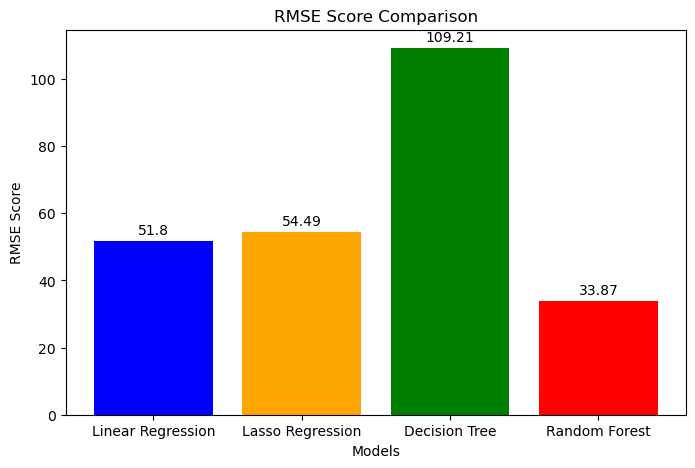

In [81]:
import matplotlib.pyplot as plt

# Store the computed values
models = ["Linear Regression", "Lasso Regression", "Decision Tree", "Random Forest"]
rmse_scores = [51.80, 54.49, 109.21, 33.87]  # Use rounded values for better display

# Plot RMSE Scores
plt.figure(figsize=(8,5))
plt.bar(models, rmse_scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("RMSE Score")
plt.title("RMSE Score Comparison")

# Display values on bars
for i, v in enumerate(rmse_scores):
    plt.text(i, v + 2, str(v), ha='center')

plt.show()
